In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Transactions sale for real estate CSV.csv')
df.head()

,المنطقة,المدينة,المدينة / الحي,الرقم المرجعي للصفقة,تاريخ الصفقة ميلادي,تاريخ الصفقة هجري,تصنيف العقار,عدد العقارات,السعر,المساحة
0,منطقة مكة المكرمه,الطائف,الطائف/ الجودية,23193889.0,2024/04/01,1445/09/22,سكني,1.0,"20,000",750.00
1,منطقة مكة المكرمه,الطائف,الطائف/ الشهداء الجنوبية,23181217.0,2024/04/01,1445/09/22,سكني,1.0,"30,000",99.00
2,منطقة مكة المكرمه,الطائف,الطائف/ الكدى,23188951.0,2024/04/01,1445/09/22,سكني,1.0,"700,000",500.00
3,منطقة مكة المكرمه,الطائف,الطائف/ الكدى,23181900.0,2024/04/01,1445/09/22,سكني,1.0,"1,300,000",595.75
4,منطقة الرياض,الرياض,الرياض/الربيع,23185701.0,2024/04/01,1445/09/22,سكني,1.0,"800,000",399.00


***EDA***

In [3]:
df.shape

(48272, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48272 entries, 0 to 48271
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   المنطقة               48271 non-null  object 
 1   المدينة               48271 non-null  object 
 2   المدينة / الحي        48271 non-null  object 
 3   الرقم المرجعي للصفقة  48271 non-null  float64
 4   تاريخ الصفقة ميلادي   48271 non-null  object 
 5   تاريخ الصفقة هجري     48271 non-null  object 
 6   تصنيف العقار          48271 non-null  object 
 7   عدد العقارات          48271 non-null  float64
 8   السعر                 48271 non-null  object 
 9   المساحة               48271 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.7+ MB


In [5]:
print(df.isna().sum())
df.dropna(how='any', inplace=True)
print(df.isna().sum())

المنطقة                 1
المدينة                 1
المدينة / الحي          1
الرقم المرجعي للصفقة    1
تاريخ الصفقة ميلادي     1
تاريخ الصفقة هجري       1
تصنيف العقار            1
عدد العقارات            1
السعر                   1
المساحة                 1
dtype: int64
المنطقة                 0
المدينة                 0
المدينة / الحي          0
الرقم المرجعي للصفقة    0
تاريخ الصفقة ميلادي     0
تاريخ الصفقة هجري       0
تصنيف العقار            0
عدد العقارات            0
السعر                   0
المساحة                 0
dtype: int64


In [6]:
df["السعر"] = df["السعر"].str.replace(",", "").astype(int)
    

In [7]:
# Convert Gregorian/Higri dates to datetime
df['تاريخ الصفقة ميلادي'] = pd.to_datetime(df['تاريخ الصفقة ميلادي'], format='%Y/%m/%d')


In [8]:
df.drop('تاريخ الصفقة هجري',axis=1,inplace=True)
df.drop('الرقم المرجعي للصفقة',axis=1,inplace=True)

In [9]:
  df["المساحة"] = df["المساحة"].str.replace(",", "").astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48271 entries, 0 to 48270
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   المنطقة              48271 non-null  object        
 1   المدينة              48271 non-null  object        
 2   المدينة / الحي       48271 non-null  object        
 3   تاريخ الصفقة ميلادي  48271 non-null  datetime64[ns]
 4   تصنيف العقار         48271 non-null  object        
 5   عدد العقارات         48271 non-null  float64       
 6   السعر                48271 non-null  int32         
 7   المساحة              48271 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 3.1+ MB


In [11]:
df["سعر المتر"] = round(df["السعر"]/df['المساحة'])
df.head()

,المنطقة,المدينة,المدينة / الحي,تاريخ الصفقة ميلادي,تصنيف العقار,عدد العقارات,السعر,المساحة,سعر المتر
0,منطقة مكة المكرمه,الطائف,الطائف/ الجودية,2024-04-01,سكني,1.0,20000,750.00,27.0
1,منطقة مكة المكرمه,الطائف,الطائف/ الشهداء الجنوبية,2024-04-01,سكني,1.0,30000,99.00,303.0
2,منطقة مكة المكرمه,الطائف,الطائف/ الكدى,2024-04-01,سكني,1.0,700000,500.00,1400.0
3,منطقة مكة المكرمه,الطائف,الطائف/ الكدى,2024-04-01,سكني,1.0,1300000,595.75,2182.0
4,منطقة الرياض,الرياض,الرياض/الربيع,2024-04-01,سكني,1.0,800000,399.00,2005.0


In [12]:
df.insert(2, 'الحي',df['المدينة / الحي'].str.split('/', expand=True)[1])

In [13]:
df.head()

,المنطقة,المدينة,الحي,المدينة / الحي,تاريخ الصفقة ميلادي,تصنيف العقار,عدد العقارات,السعر,المساحة,سعر المتر
0,منطقة مكة المكرمه,الطائف,الجودية,الطائف/ الجودية,2024-04-01,سكني,1.0,20000,750.00,27.0
1,منطقة مكة المكرمه,الطائف,الشهداء الجنوبية,الطائف/ الشهداء الجنوبية,2024-04-01,سكني,1.0,30000,99.00,303.0
2,منطقة مكة المكرمه,الطائف,الكدى,الطائف/ الكدى,2024-04-01,سكني,1.0,700000,500.00,1400.0
3,منطقة مكة المكرمه,الطائف,الكدى,الطائف/ الكدى,2024-04-01,سكني,1.0,1300000,595.75,2182.0
4,منطقة الرياض,الرياض,الربيع,الرياض/الربيع,2024-04-01,سكني,1.0,800000,399.00,2005.0


In [14]:
df.drop('المدينة / الحي',axis=1, inplace=True)
df.head()

,المنطقة,المدينة,الحي,تاريخ الصفقة ميلادي,تصنيف العقار,عدد العقارات,السعر,المساحة,سعر المتر
0,منطقة مكة المكرمه,الطائف,الجودية,2024-04-01,سكني,1.0,20000,750.00,27.0
1,منطقة مكة المكرمه,الطائف,الشهداء الجنوبية,2024-04-01,سكني,1.0,30000,99.00,303.0
2,منطقة مكة المكرمه,الطائف,الكدى,2024-04-01,سكني,1.0,700000,500.00,1400.0
3,منطقة مكة المكرمه,الطائف,الكدى,2024-04-01,سكني,1.0,1300000,595.75,2182.0
4,منطقة الرياض,الرياض,الربيع,2024-04-01,سكني,1.0,800000,399.00,2005.0


In [15]:
df['عدد العقارات'].value_counts()

عدد العقارات
1.0      47817
2.0        274
4.0         48
8.0         31
3.0         29
6.0         20
10.0        17
5.0         10
12.0         9
7.0          4
14.0         2
20.0         2
326.0        1
15.0         1
16.0         1
9.0          1
11.0         1
55.0         1
18.0         1
17.0         1
Name: count, dtype: int64

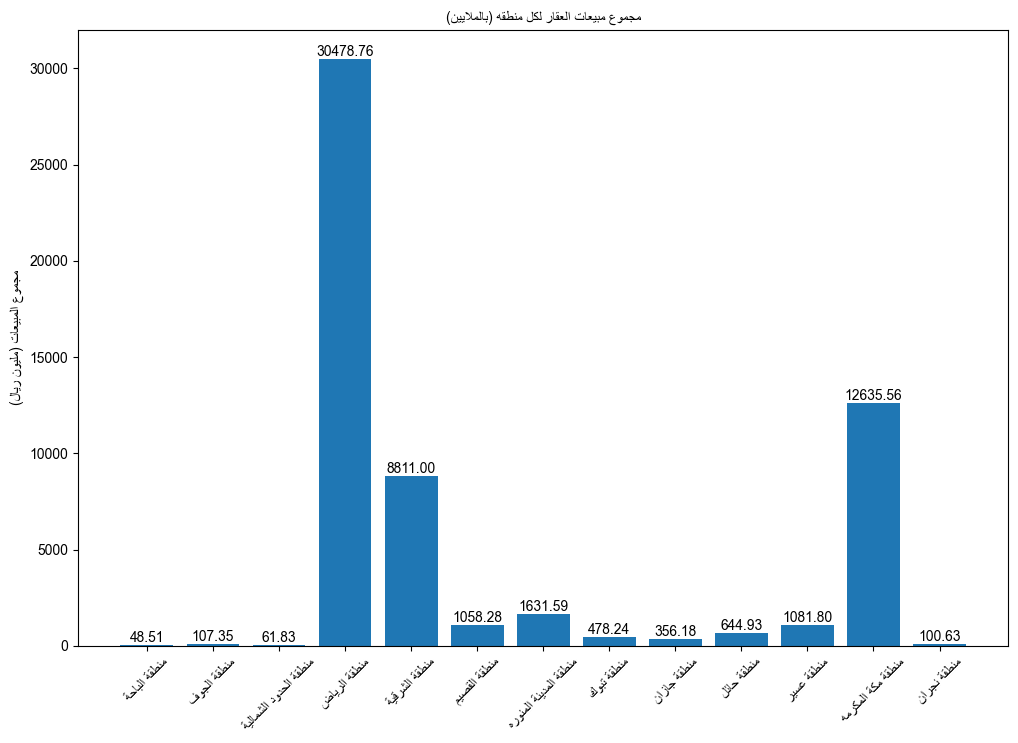

In [16]:
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

# Group by region, calculate total price of sold real estates, and store in a Series
mean_price_by_region = df.groupby('المنطقة')['السعر'].sum()

# Reshape Arabic text to be properly displayed
reshaped_regions = [get_display(arabic_reshaper.reshape(region)) for region in mean_price_by_region.index]

# Load an Arabic-supporting font
arabic_font = 'C:/Windows/Fonts/arial.ttf'

plt.figure(figsize=(12, 8))
bars = plt.bar(reshaped_regions, mean_price_by_region.values / 1_000_000)  # Divide by a million

# Add title and labels with Arabic support
plt.title(get_display(arabic_reshaper.reshape('مجموع مبيعات العقار لكل منطقه (بالملايين)')),
          fontproperties=fm.FontProperties(fname=arabic_font))

plt.ylabel(get_display(arabic_reshaper.reshape('مجموع المبيعات (مليون ريال)')),
           fontproperties=fm.FontProperties(fname=arabic_font))

plt.xticks(rotation=45, fontproperties=fm.FontProperties(fname=arabic_font))
plt.yticks(fontproperties=fm.FontProperties(fname=arabic_font))

# Add the values on top of the bars, divided by a million and with smaller font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', 
             fontproperties=fm.FontProperties(fname=arabic_font), fontsize=10)  # Smaller font size

plt.show()


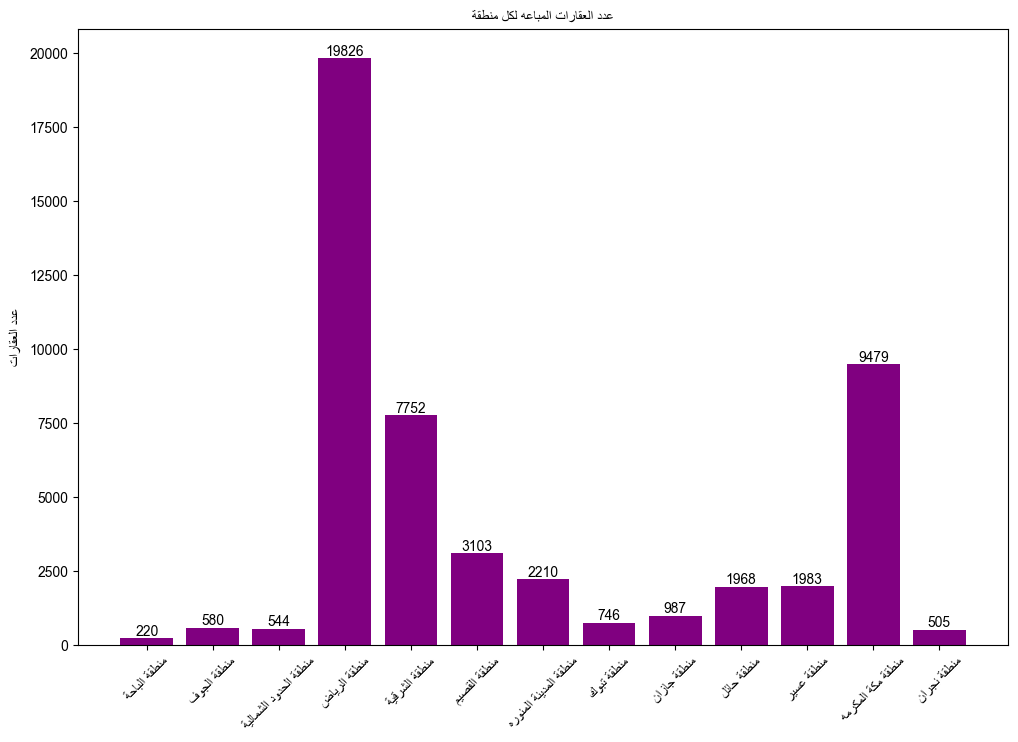

In [17]:
sum_of_sold_realEstates_by_region = df.groupby('المنطقة')['عدد العقارات'].sum()

# Reshape Arabic text to be properly displayed
reshaped_regions = [get_display(arabic_reshaper.reshape(region)) for region in sum_of_sold_realEstates_by_region.index]


plt.figure(figsize=(12, 8))
bars = plt.bar(reshaped_regions, sum_of_sold_realEstates_by_region.values, color='purple')  # Set bar color to red

# Add title and labels with Arabic support
plt.title(get_display(arabic_reshaper.reshape('عدد العقارات المباعه لكل منطقة')),
          fontproperties=fm.FontProperties(fname=arabic_font))  # Adjust if needed

plt.ylabel(get_display(arabic_reshaper.reshape('عدد العقارات')),
          fontproperties=fm.FontProperties(fname=arabic_font))  # Adjust if needed

plt.xticks(rotation=45, fontproperties=fm.FontProperties(fname=arabic_font))
plt.yticks(fontproperties=fm.FontProperties(fname=arabic_font))

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom',
             fontproperties=fm.FontProperties(fname=arabic_font), fontsize=10)  # Smaller font size

plt.show()


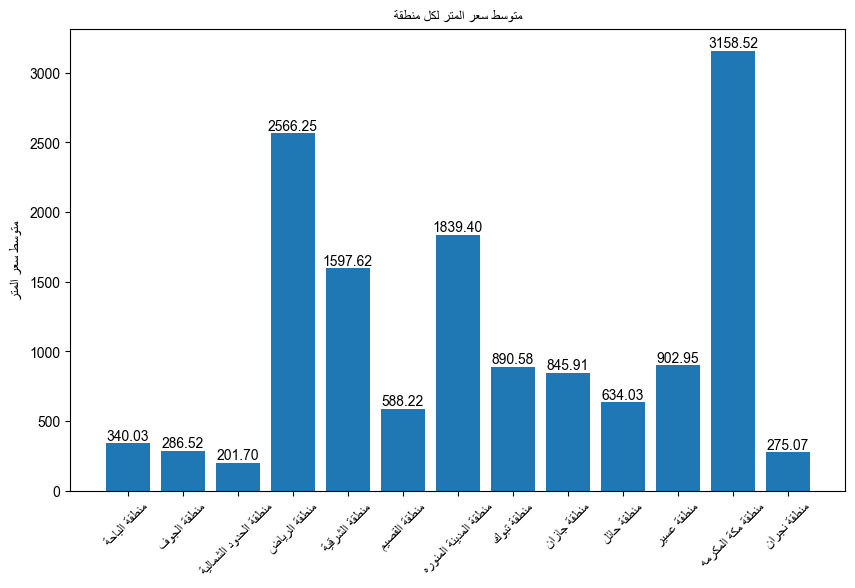

In [35]:
# Group by region, calculate mean price per square meter, and store in a Series
mean_of_meter_price_by_region = df.groupby('المنطقة')['سعر المتر'].mean()

# Reshape Arabic text to be properly displayed
reshaped_regions = [get_display(arabic_reshaper.reshape(region)) for region in mean_of_meter_price_by_region.index]

# Load an Arabic-supporting font
arabic_font = 'C:/Windows/Fonts/arial.ttf'

plt.figure(figsize=(10, 6))
bars = plt.bar(reshaped_regions, mean_of_meter_price_by_region.values)

# Add title and labels with Arabic support
plt.title(get_display(arabic_reshaper.reshape('متوسط سعر المتر لكل منطقة')),
          fontproperties=fm.FontProperties(fname=arabic_font))

plt.ylabel(get_display(arabic_reshaper.reshape('متوسط سعر المتر')),
           fontproperties=fm.FontProperties(fname=arabic_font))

plt.xticks(rotation=45, fontproperties=fm.FontProperties(fname=arabic_font))
plt.yticks(fontproperties=fm.FontProperties(fname=arabic_font))

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', 
             fontproperties=fm.FontProperties(fname=arabic_font), fontsize=10)  # Smaller font size

plt.show()



Riyadh stands out as the leading region both in terms of real estate sales volume and the total revenue generated. This trend indicates a significant demand for real estate in Riyadh, likely driven by its status as the capital and a key economic hub.

Makkah emerges with the highest mean price per square meter. This premium pricing can be attributed to its religious importance, with the presence of the Holy Mosque in Makkah, and the strategic importance of Jeddah, the scond econonimic hub in Saudi Arabia after the capital.

In [19]:
df_riyadhRegion = df[df['المنطقة']=='منطقة الرياض'].drop('المنطقة',axis=1)
df_riyadhRegion.head()

,المدينة,الحي,تاريخ الصفقة ميلادي,تصنيف العقار,عدد العقارات,السعر,المساحة,سعر المتر
4,الرياض,الربيع,2024-04-01,سكني,1.0,800000,399.00,2005.0
5,الرياض,الربيع,2024-04-01,سكني,1.0,805661,250.00,3223.0
6,الرياض,العزيزية,2024-04-01,سكني,1.0,1254906,697.17,1800.0
8,حوطة بني تميم,الورود,2024-04-01,سكني,1.0,820000,293.60,2793.0
9,الرياض,أحد,2024-04-01,سكني,1.0,800000,500.00,1600.0


***Null hyopthesis: 70% of the total real estate sales volume in Riyadh region is equal or more than Riyadh city***


***Alternative hypothesis: 70% of the total real estate sales volumein Riyadh region is less than Riyadh city***

In [20]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install --upgrade pip

In [23]:
import scipy.stats as st
import numpy as np

# Calculate total sales and Riyadh city sales
total_sales = df_riyadhRegion['عدد العقارات'].sum()
riyadh_city_sales = df_riyadhRegion[df_riyadhRegion['المدينة'] == 'الرياض']['عدد العقارات'].sum()

# Calculate hypothesized sales for Riyadh city
hypothesized_riyadh_sales = 0.73 * total_sales

# Perform the one-tailed Z-test
z_score = (riyadh_city_sales - hypothesized_riyadh_sales) / np.sqrt(total_sales * 0.73 * 0.27)
p_value = st.norm.sf(z_score)  # One-tailed test for larger values

# Set a significance level (e.g., alpha = 0.05)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Riyadh city sales are significantly greater than 73% of the total.")
else:
    print("Fail to reject the null hypothesis: Riyadh city sales are not significantly greater than 73% of the total.")


Reject the null hypothesis: Riyadh city sales are significantly greater than 73% of the total.


The captial siginficantly takes over 73% of the total sales in the main region which highlites the siginficance impact on the reigon.

In [41]:

df_riyadhRegion.groupby('المدينة')['سعر المتر'].agg(['mean']).sort_values(by='mean',ascending=False)


,mean
المدينة,
عرقه,21562.000000
الرياض,3233.520026
الدرعيه,2827.713740
الخرج,745.625438
المجمعه,569.430678
حوطة بني تميم,437.800000
الزلفي,406.120172
المزاحميه,387.449495
رماح,370.605634


In [42]:
df_riyadh = df_riyadhRegion[
    (df_riyadhRegion['المدينة'] == 'الرياض') |
    (df_riyadhRegion['المدينة'] == 'عرقه') |
    (df_riyadhRegion['المدينة'] == 'الدرعيه')
]
df_riyadh.head()

,المدينة,الحي,تاريخ الصفقة ميلادي,تصنيف العقار,عدد العقارات,السعر,المساحة,سعر المتر
4,الرياض,الربيع,2024-04-01,سكني,1.0,800000,399.00,2005.0
5,الرياض,الربيع,2024-04-01,سكني,1.0,805661,250.00,3223.0
6,الرياض,العزيزية,2024-04-01,سكني,1.0,1254906,697.17,1800.0
9,الرياض,أحد,2024-04-01,سكني,1.0,800000,500.00,1600.0
14,الرياض,الزهرة,2024-04-01,سكني,1.0,800000,144.89,5521.0


In [44]:

df_riyadh.groupby('الحي')['سعر المتر'].agg(['mean']).sort_values(by='mean',ascending=False).head(10)


,mean
الحي,
الصحافة,11873.057143
المحمدية,11372.774194
الرحمانية,11131.400000
الملقا,10848.218107
النخيل,10408.750000
المغرزات,10181.300000
الرائد,9940.078947
الازدهار,9851.074074
العليا,9792.724638


The resulting Series shows the top 10 of the most expensive neighborhoods by average price per square meter in that period.